In [1]:
from tensorflow.keras.datasets import mnist

(train_input,train_target),(test_input,test_target) = mnist.load_data()

In [2]:
train_input.shape

(60000, 28, 28)

입력은 28*28*1

In [3]:
test_input.shape

(10000, 28, 28)

In [4]:
# 데이터 전처리
from tensorflow.keras.utils import to_categorical

train_input = train_input.reshape((-1,28,28,1)) / 255.0
test_input = test_input.reshape((-1,28,28,1)) / 255.0
train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

# 아래 같은 신경망을 만들어라!
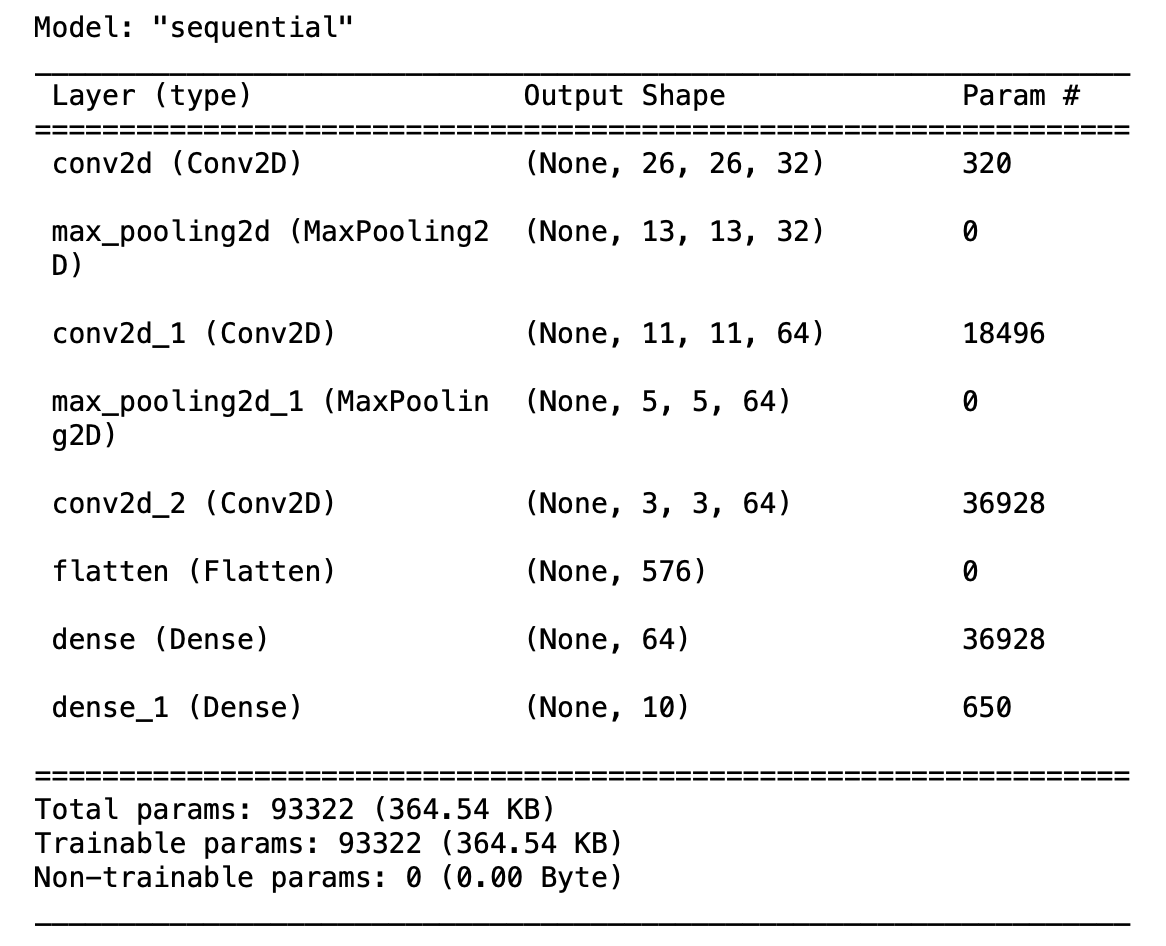

In [5]:
# CNN 생성
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()

model.add(layers.Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

2023-10-16 14:44:14.643460: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-10-16 14:44:14.643491: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-16 14:44:14.643506: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-16 14:44:14.643583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-16 14:44:14.643912: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [7]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.fit(train_input,train_target,epochs=5,batch_size=64)

Epoch 1/5


2023-10-16 14:44:16.709746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 18s 16ms/step - loss: 0.1715 - accuracy: 0.9475
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: 0.0500 - accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 15s 15ms/step - loss: 0.0354 - accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0279 - accuracy: 0.9916
Epoch 5/5
938/938 [==============================] - 15s 16ms/step - loss: 0.0246 - accuracy: 0.9927
